# Notebook Overview, Modeling_Evaluation_Analysis

* Pre- processing in preparation for modeling. 


* SKLean Modeling, 


* PyCaret Modeling, depending on computing processing power.


* SWOT Analysis (Post Modeling Analysis)


* Recommendations/Next Steps

# Loading Dependencies 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', 200, 'display.max_columns', 200)

%config Completer.use_jedi = False

# Asset Loading

In [2]:
# Creating a pandas dataframe to work with. 
# Also, including low_memory option to mitigate the taxing computational resources

Working_DF = pd.read_csv('clean_accepted_3.csv', low_memory=True)

In [3]:
# Sanity checking the Working_DF

Working_DF.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,initial_list_status,application_type,tot_cur_bal,mort_acc,pub_rec_bankruptcies,annual_inc_log,fico_score
0,25000.0,36 months,17.99,903.69,D,D2,1,MORTGAGE,67500.0,Source Verified,Mar-2017,Charged Off,debt_consolidation,TX,19.41,1995,25.0,0.0,43658.0,56.3,f,Individual,173292.0,2.0,0.0,11.119883,662.0
1,10000.0,36 months,11.53,329.91,B,B5,3,RENT,45000.0,Not Verified,Jun-2015,Fully Paid,debt_consolidation,WA,29.23,2003,20.0,0.0,7459.0,58.3,f,Individual,62916.0,0.0,0.0,10.714418,682.0
2,6950.0,36 months,15.88,243.93,C,C4,3,RENT,41810.0,Verified,Sep-2013,Fully Paid,debt_consolidation,WA,17.25,1988,6.0,1.0,10723.0,58.0,f,Individual,197096.0,2.0,1.0,10.640891,667.0
3,24000.0,60 months,12.69,542.28,C,C2,3,MORTGAGE,100000.0,Not Verified,Sep-2015,Fully Paid,debt_consolidation,AZ,22.22,1996,9.0,0.0,22654.0,89.2,w,Individual,281268.0,2.0,0.0,11.512925,697.0
4,15000.0,60 months,24.99,440.19,F,F4,10,MORTGAGE,65000.0,Verified,Jan-2014,Fully Paid,debt_consolidation,MA,25.24,2003,16.0,0.0,9269.0,25.3,f,Individual,253377.0,2.0,0.0,11.082143,667.0


In [4]:
# Checking info and dtypes

Working_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246269 entries, 0 to 246268
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             246269 non-null  float64
 1   term                  246269 non-null  object 
 2   int_rate              246269 non-null  float64
 3   installment           246269 non-null  float64
 4   grade                 246269 non-null  object 
 5   sub_grade             246269 non-null  object 
 6   emp_length            246269 non-null  int64  
 7   home_ownership        246269 non-null  object 
 8   annual_inc            246269 non-null  float64
 9   verification_status   246269 non-null  object 
 10  issue_d               246269 non-null  object 
 11  loan_status           246269 non-null  object 
 12  purpose               246269 non-null  object 
 13  addr_state            246269 non-null  object 
 14  dti                   246269 non-null  float64
 15  

# Pre-Processing

## Addressing Multi-collinearity

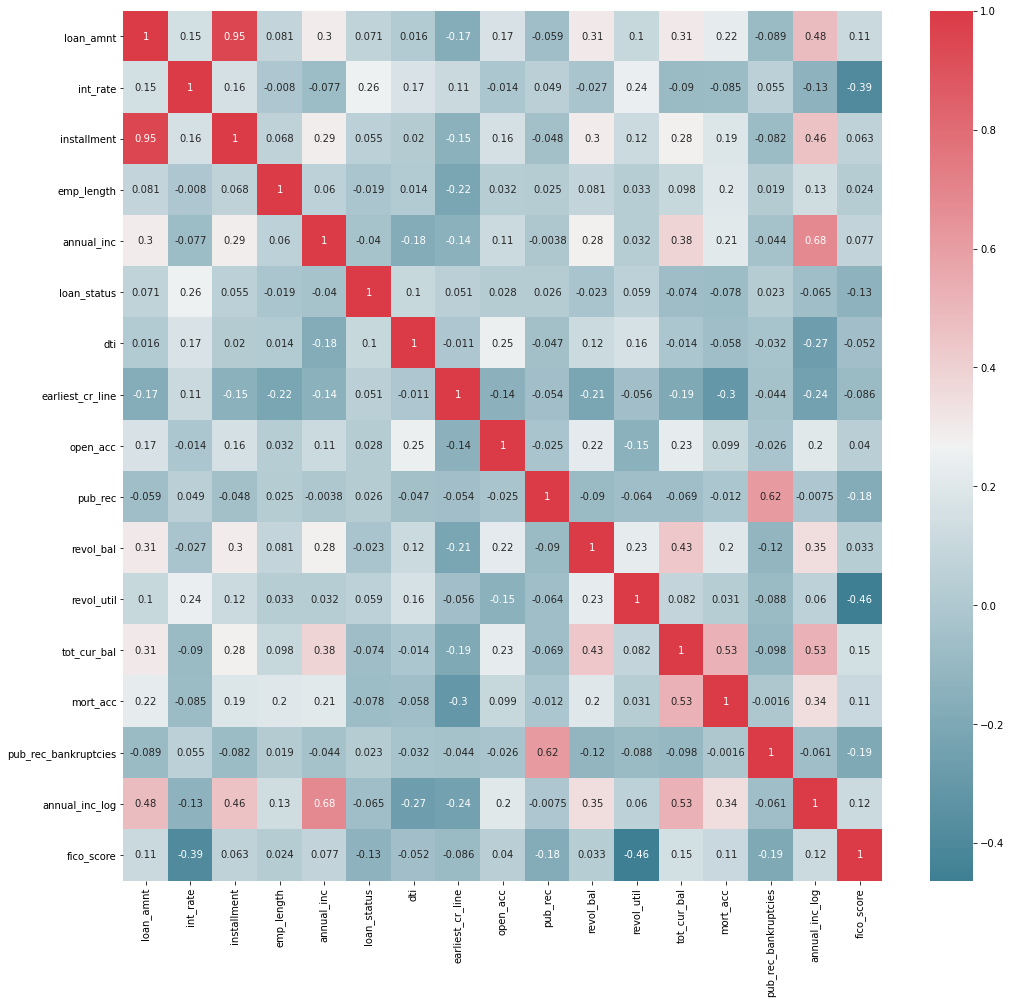

In [33]:
# checking correlation

def correlation_heatmap(df1):
   _,ax=plt.subplots(figsize=(17,16))
   colormap=sns.diverging_palette(220,10,as_cmap=True)
   sns.heatmap(Working_DF.corr(),annot=True,cmap=colormap)
   
correlation_heatmap(Working_DF)

In [ ]:
# dropping highly correlated feature

Working_DF.drop(['installment'], axis=1, inplace=True)

In [ ]:
# checking for correlation

correlation_heatmap(Working_DF)

In [ ]:
# checking all the vaiables

Working_DF.info()

Key Points:

* Base on the heatmap we were able to reduce some of the feature that were highly correlated.

* We also removed some categorical features that were good for our EDA, but may not be useful in modeling. 

## Pre-processing of Response Variable

/Users/B_A_S_i_C/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Demographic of Target')

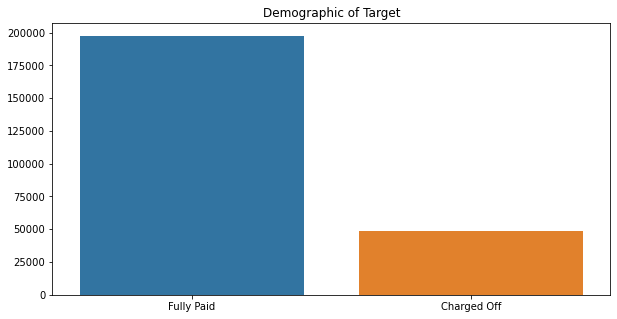

In [5]:
# creating a visual to represent the distribution of our response variable

target = Working_DF['loan_status'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(target.index, target.values).set_title('Demographic of Target')
#plt.savefig('Target_bar')

In [6]:
# Creating the binary for our reponse variable

Working_DF['loan_status'] = Working_DF['loan_status'].replace('Charged Off',1)
Working_DF['loan_status'] = Working_DF['loan_status'].replace('Fully Paid',0)

In [7]:
# Sanity Check

weights = Working_DF['loan_status'].value_counts(normalize=True).apply(lambda x: 1/x)
weights = weights/weights.min()

In [8]:
weights

0    1.000000
1    4.037927
Name: loan_status, dtype: float64

Key Points:

* Turning our response-target variable into binary variables


* Knowing that we have a class imbalance we prepared a class weighting variable to be used during post baseline modeling.

## Pre-processing Feature-Variables within our Asset

In [9]:
## Continous Reference

continous = Working_DF.select_dtypes('number').head()
continous.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'tot_cur_bal', 'mort_acc',
       'pub_rec_bankruptcies', 'annual_inc_log', 'fico_score'],
      dtype='object')

In [10]:
## Categorical reference

categorical = Working_DF.select_dtypes('object')
categorical.columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'addr_state', 'initial_list_status',
       'application_type'],
      dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import StandardScaler

## Dummy out categorical features

df_dummy = pd.get_dummies(Working_DF, columns=['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'addr_state', 'initial_list_status',
       'application_type'], drop_first=True)

In [12]:
# Converting all floats into whole numbers

df_dummy = df_dummy.astype({'loan_amnt': 'int', 'int_rate' : 'int', 'emp_length': 'int', 
                            'loan_status' : 'int', 'dti': 'int','earliest_cr_line' : 'int', 
                            'open_acc' : 'int', 'pub_rec': 'int', 'revol_bal': 'int', 
                            'revol_util' : 'int', 'tot_cur_bal' : 'int', 'mort_acc': 'int', 
                            'pub_rec_bankruptcies': 'int', 'annual_inc_log': 'int','fico_score': 'int'}) 

## Train-Test-Split

In this section we will set up our modeling process and helper functions for post model training analysis. 

Please bear in mind that we may opt to use an additional library called Pycaret to ensure a more robust analysis, save on computing power, and for evaluation for this iteration of this project. 

In [16]:
# Setting up the variables

X = df_dummy.drop(columns='loan_status')
y = df_dummy.loan_status

In [17]:
## Train test split


from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [18]:
# Adding weighted class to our y_train set

weights = y_train.value_counts(normalize=True).apply(lambda x: 1/x)
weights = weights/weights.min()

In [19]:
# creating the weights variable for preparation for hyper param tuning

weights = weights.to_dict()

In [20]:
# Scaling the asset

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modeling

###### Note this section is subject to change given computing process limitations or deadline constraints  with respects to Version 1 of this initiative 

Process Workflow for Modeling:

1) Model Selection (analysis, model evaluation) >> 

Baseline Models:

* Logistic Regression

Additional SKLean Models (subject to change):
* Support Vector Machine (Classifier) 
* Naive Bayes Classifier


2) Tune Model (hyperparamater analysis, model evaluation) >> 

* Weighted Classes to handle the Class Imbalance
* Applying GridSearchCV for cross validation and best hyper parameters


3) Best Model Evaluation with Commentary

* Best Model Evaluation 
* Key Benchmarks
* Summary (with Next Steps)

In [13]:
# Instanciating the necessary metric libraries

from sklearn.model_selection import KFold,RepeatedStratifiedKFold,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


### Metric(s) Focus

We will focus on False Negatives as we want to account for all borrowers who would default and not overlook borrowers who were miss categorized. 

* Recall will be or metric emphasis as it is the more valuable indicator in understanding borrowers who will default.

However, we will have two other metrics as a back-up in the likelihood Recall is too low. As we still want this version of the best model to be able to identify our response variable variables.

* Accuracy, to identify how our model is at predicting on the over all asset.

* ROC-AUC, to identify ranking of uniformity of the expected proportion of the true positive rate and false positive rate

Note, we will allow a bit of flexibility in terms of metrics to help come to a determination on the potential next steps following this iteration for the next phase of this initiative 

## Helper function for metrics used for model evaluation

In [15]:
# helper function for metric eval Training set

def train_model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred_1 = model.predict(X_train)
    
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_train, y_pred_1)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Training Set Confusion Matrix", fontdict = {'size':18}, pad = 20)
    
    
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_train, y_pred_1))
    

In [14]:
# helper function for metric eval of Test Set

def test_model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Testing Set Confusion Matrix", fontdict = {'size':18}, pad = 20)
    
    
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    


## Baseline

### Logistic Regression

              precision    recall  f1-score   support

           0       0.81      0.98      0.89    157909
           1       0.57      0.08      0.14     39106

    accuracy                           0.81    197015
   macro avg       0.69      0.53      0.52    197015
weighted avg       0.76      0.81      0.74    197015



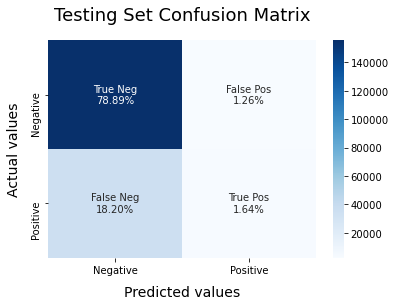

In [21]:
## Fitting the model

Log_reg = LogisticRegression()
Log_reg.fit(X_train, y_train)

# Train Eval
train_model_Evaluate(Log_reg)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     39477
           1       0.55      0.08      0.13      9777

    accuracy                           0.80     49254
   macro avg       0.68      0.53      0.51     49254
weighted avg       0.76      0.80      0.74     49254



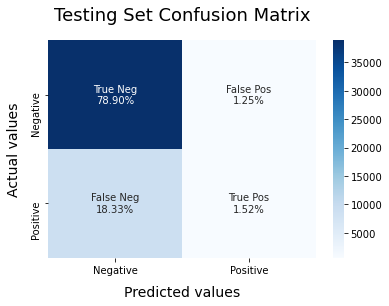

In [22]:
# Test Eval

test_model_Evaluate(Log_reg)

Key Points:

* 80% accuracy, but with very unfavorable results in terms of recall. 

* We see only a 1.2% hit on the True Positive which signals the class imbalance. 


Considerations: 

* Addressing the class imbalance, hopefully it will help in identifying the true postives

## Model Optimization

### Logistic Regression, with Class Weighting

              precision    recall  f1-score   support

           0       0.89      0.64      0.75    157909
           1       0.32      0.69      0.44     39106

    accuracy                           0.65    197015
   macro avg       0.61      0.66      0.59    197015
weighted avg       0.78      0.65      0.69    197015



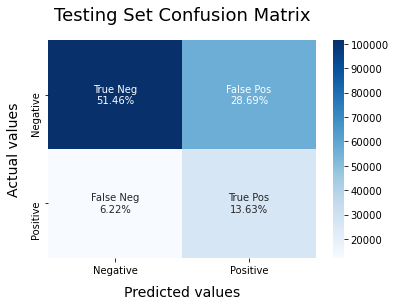

In [28]:
## Fitting the weighted_model

weighted_Log_reg = LogisticRegression(class_weight=weights)
weighted_Log_reg.fit(X_train, y_train)

# Train Eval
train_model_Evaluate(weighted_Log_reg)

              precision    recall  f1-score   support

           0       0.89      0.64      0.75     39477
           1       0.32      0.69      0.44      9777

    accuracy                           0.65     49254
   macro avg       0.61      0.67      0.59     49254
weighted avg       0.78      0.65      0.69     49254



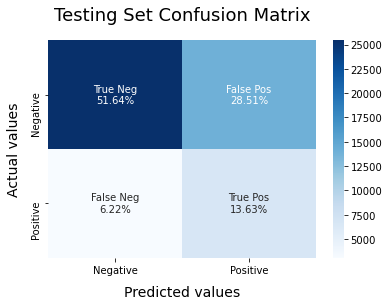

In [29]:
# Test Eval

test_model_Evaluate(weighted_Log_reg)

Key Points: 


* With the class weighting we a better performance in terms of recall with both classes almost at 61% across the board

* Application of class weighting has been helpful in balancing the classes with respect to our response variable class imbalance. 


Consideration(s):


* We will further optimize and test performance applying GridSearch CV for tuning parameters

* Testing our bespoke class weighting or having a "balanced" class weight will help in increasing model performance.

### Logistic Regression, with GridSearchCV

In [86]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'class_weight': [weights, 'balanced']}

grid = GridSearchCV(estimator=LogisticRegression(),
                    param_grid=param_grid,
                    scoring='recall',
                    verbose=1,
                    n_jobs=-1)

result = grid.fit(X_train, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  8.9min finished


In [87]:
print(result.best_score_)
print(result.best_params_)

0.7644094855582091
{'C': 0.1, 'class_weight': 'balanced', 'fit_intercept': False, 'penalty': 'l2'}


              precision    recall  f1-score   support

           0       0.91      0.55      0.68    157909
           1       0.30      0.77      0.43     39106

    accuracy                           0.59    197015
   macro avg       0.60      0.66      0.56    197015
weighted avg       0.78      0.59      0.63    197015



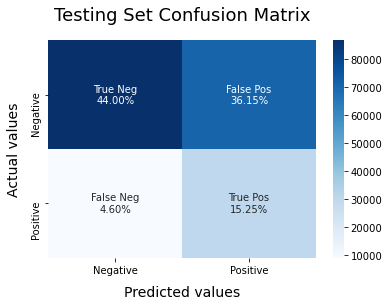

In [25]:
## Fitting the tuned model

tuned_Log_reg = LogisticRegression(C=0.1, fit_intercept=False, penalty='l2', class_weight='balanced')
tuned_Log_reg.fit(X_train, y_train)

# Train Eval
train_model_Evaluate(tuned_Log_reg)

              precision    recall  f1-score   support

           0       0.91      0.55      0.69     39477
           1       0.30      0.77      0.43      9777

    accuracy                           0.59     49254
   macro avg       0.60      0.66      0.56     49254
weighted avg       0.79      0.59      0.63     49254



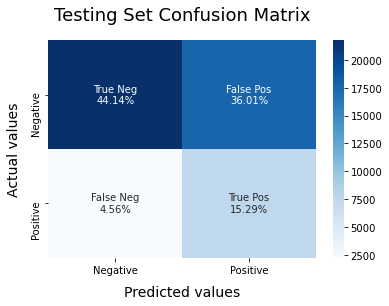

In [26]:
# Test Eval

test_model_Evaluate(tuned_Log_reg)

Key Points:


* Based on the GridSearch CV parameters we see a slight decrease in performance unlike our un-tuned baseline Logistic Regression model


* Surprisingly, GridSearch CV has selected "balanced" as the best class weight parameter. 


Consideration(s):

* Testing hyper-parameters with the bespoke class weight and see if model performance improves.

              precision    recall  f1-score   support

           0       0.91      0.55      0.68    157909
           1       0.30      0.77      0.43     39106

    accuracy                           0.59    197015
   macro avg       0.60      0.66      0.56    197015
weighted avg       0.78      0.59      0.63    197015



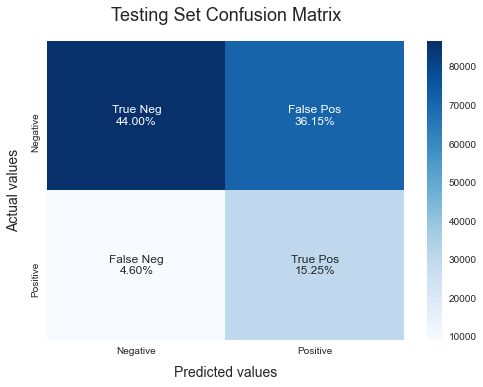

In [89]:
## Fitting the tuned model

tuned_weights_Log_reg = LogisticRegression(C=0.1, fit_intercept=False, penalty='l2', class_weight=weights)
tuned_weights_Log_reg.fit(X_train, y_train)

# Train Eval
train_model_Evaluate(tuned_weights_Log_reg)

              precision    recall  f1-score   support

           0       0.91      0.55      0.69     39477
           1       0.30      0.77      0.43      9777

    accuracy                           0.59     49254
   macro avg       0.60      0.66      0.56     49254
weighted avg       0.79      0.59      0.63     49254



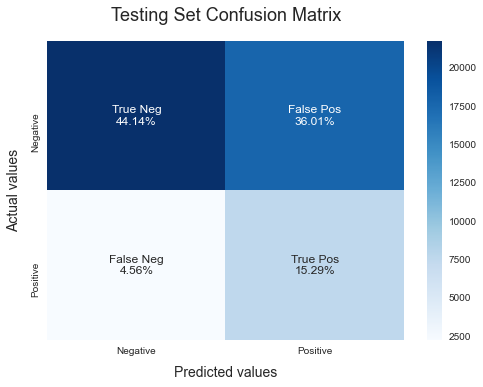

In [90]:
# Test Eval
test_model_Evaluate(tuned_weights_Log_reg)

## The Need for Speed and External Efficiencies 

At this point in time due to time constraints regarding the project benchmark, we will move forward with Auto Machine Learning.  We will be using PyCaret. 

The word caret originally came from a library in R, called Caret (Classification And REgression Training) created by Max Kuhnwho to help streamline the process of model development. In 2019 Moez Ali and the popular shift from R to Python, recognized the need for a similar tool to do the same within a Python environment. And, that’s how PyCaret was born.

PyCaret is a Python wrapper that has machine learning libraries and frameworks such as scikit-learn, XGBoost, Random Forest, and much more. Again, the library performs end-to-end machine learning experiments, whether that’s imputing missing values, encoding categorical data, feature engineering, hyperparameter tuning, or building ensemble models. Also, all operations performed are stored in a pipeline that is ready for deployment.

* Note, after reporting our initiative's minimum viable product, we will continue to build out baseline, tuned/optimized models, and perform model evaluations via the SKLean module. Again, just to emphasize, PyCaret is supplemental to our modeling process and will play role again in our Phase Three iteration of this initiative. 

# Auto Machine Learning

In this section we will apply PyCaret (Classification And REgression Training.).

* The reason we are using PyCaret for our modeling and pre-deployment process is due to it's ability to run multiple models at once. Therefore, saving both time and computing power. As seen above when performing models, the time taken for the models to complete are quite time consuming. This is also a great tool to leverage given the scale of the data. *

## Modeling (Auto ML)

Process Workflow for Auto ML Modeling:

1) Model Selection (10 fold cv, hyperparamater tuning/analysis, model evaluation) >> 


2) Tune Model (10 fold cv, hyperparamater analysis, model evaluation) >> 


3) Best Model Evaluation with Commentary

In [30]:
# Pycaret
from pycaret.classification import *

In [31]:
# Eniroment setup
clf = setup(data=df_dummy, target = 'loan_status',fix_imbalance= True, session_id=456)

,Description,Value
0,session_id,456
1,Target,loan_status
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(246269, 203)"
5,Missing Values,False
6,Numeric Features,199
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


## Performance Indicators and Model Comparison

We will prioritize Recall, Accuracy, and AUC


Benchmark indicators: 

* Recall: should be above .45


* Accuracy: equal or above .60


* AUC: should be equal or above .50/.60, ideally over .70 for better balance in predicting our positive class


For the purpose of this version of the initiative we will consider two out of the three benchmark indicators as a green light for model selection. Also, in consideration, if either one metric stands out we will raise the question, if we should include it to our model selection list.

In [32]:
# Model Comparison based on recall

best_model = compare_models(sort = 'Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.1998,0.5006,0.9999,0.1990,0.3319,0.0005,0.0145,18.5700
nb,Naive Bayes,0.4704,0.6582,0.7949,0.2443,0.3737,0.1001,0.1543,6.1370
lr,Logistic Regression,0.6144,0.6747,0.6415,0.2898,0.3988,0.1718,0.2008,33.1860
svm,SVM - Linear Kernel,0.5444,0.0000,0.5444,0.2545,0.3050,0.0722,0.0833,22.1650
knn,K Neighbors Classifier,0.5810,0.5364,0.4393,0.2211,0.2941,0.0404,0.0452,19.3630
dt,Decision Tree Classifier,0.7068,0.5512,0.2928,0.2761,0.2842,0.1001,0.1001,13.0080
ada,Ada Boost Classifier,0.7745,0.6629,0.1874,0.3685,0.2482,0.1319,0.1424,31.2380
gbc,Gradient Boosting Classifier,0.7951,0.6922,0.1398,0.4506,0.2133,0.1316,0.1617,134.1760
catboost,CatBoost Classifier,0.8044,0.7214,0.1198,0.5352,0.1958,0.1327,0.1819,127.5090
xgboost,Extreme Gradient Boosting,0.8025,0.7168,0.1143,0.5150,0.1871,0.1238,0.1702,248.7170


## Models We will prioritize for modeling:

* Light Gradient Boosting Machine, 

with an accuracy of .80, AUC at .07; however, the Recall is low. As we mentioned earlier We will have three metrics to help guide us and LightGBM hits both accuracy and AUC.


* Logistic Regression, 

Accuracy is .60, AUC is .66, and recall is at .64 -- hitting pretty decent scores. Unlike earlier when in our baseline above which was at 80% accuray but the recall on both the test and training set were not very favorable. The reason we could be seeing due to SMOTE


* Naive Bayes, 

with an AUC of .65 and Recall at .81, it's fall within our benchmark indications. However, accuracy at .45, we will allow it for experimental purposes for now. 


## Light Gradient Boosting Machine

### LightGBM, Baseline

In [36]:
# creating the model

lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8046,0.7228,0.0937,0.5487,0.1601,0.1084,0.1644
1,0.8041,0.7244,0.0928,0.5417,0.1585,0.1065,0.1614
2,0.8050,0.7258,0.0969,0.5543,0.1650,0.1125,0.1690
3,0.8032,0.7202,0.0873,0.5301,0.1499,0.0993,0.1527
4,0.8025,0.7180,0.0972,0.5179,0.1636,0.1076,0.1574
5,0.8028,0.7283,0.0983,0.5217,0.1655,0.1093,0.1596
6,0.8051,0.7213,0.1039,0.5519,0.1749,0.1194,0.1745
7,0.8041,0.7193,0.0899,0.5442,0.1543,0.1038,0.1594
8,0.8053,0.7188,0.0998,0.5570,0.1693,0.1159,0.1725
9,0.8062,0.7214,0.0998,0.5710,0.1699,0.1177,0.1770


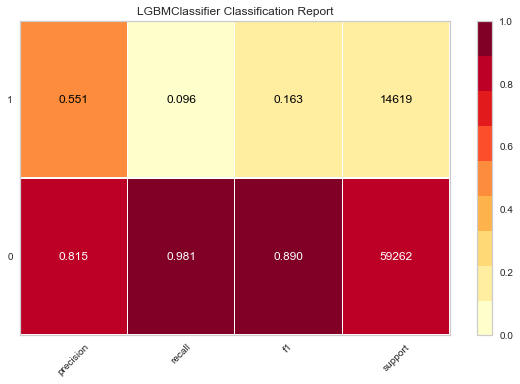

In [53]:
# Classification Report

plot_model(lightgbm, plot='class_report')

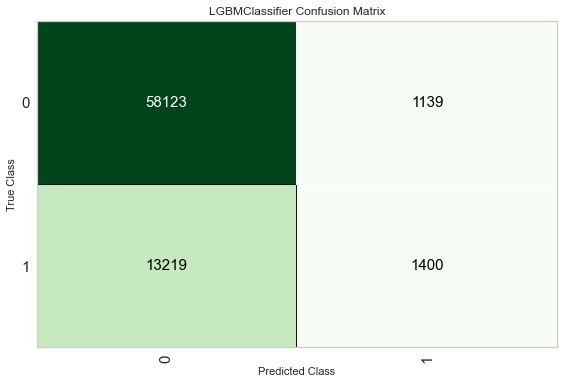

In [52]:
# Confusion Matrix

plot_model(lightgbm, plot='confusion_matrix')

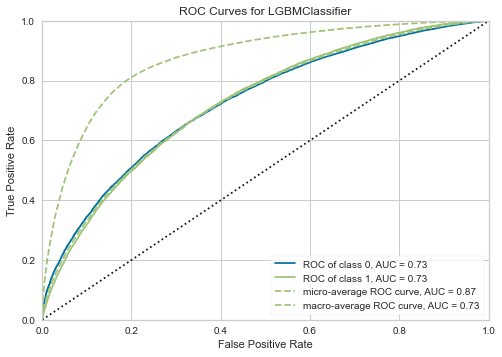

In [38]:
#base model ROC

plot_model(lightgbm, plot = 'auc')

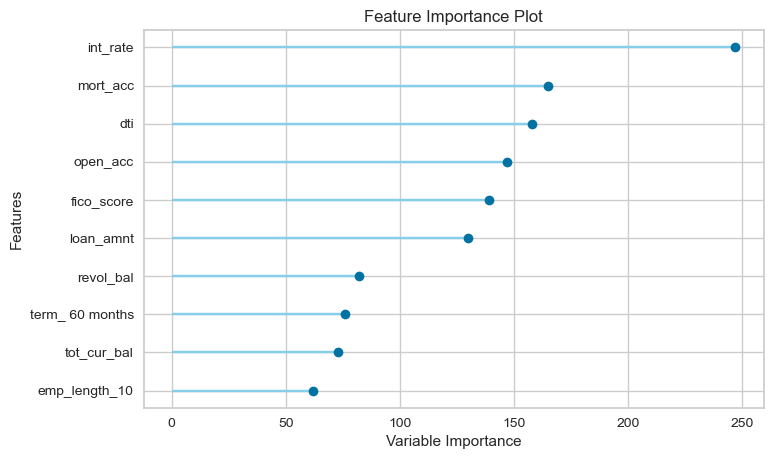

In [62]:
# Feature Importance

plot_model(lightgbm, plot='feature')

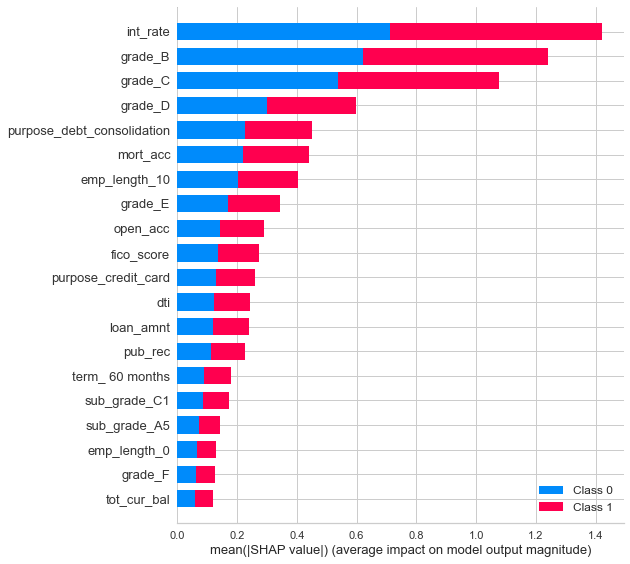

In [64]:
#Model Interprtation

interpret_model(lightgbm)

### LightGBM, Tuned and Optimized

In [46]:
# tuned model

tuned_lightgbm = tune_model(lightgbm, optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7859,0.6807,0.1996,0.4189,0.2704,0.1630,0.1784
1,0.7855,0.6840,0.1886,0.4133,0.2590,0.1536,0.1698
2,0.7850,0.6825,0.1988,0.4147,0.2687,0.1607,0.1756
3,0.7868,0.6749,0.1203,0.3836,0.1831,0.0975,0.1194
4,0.7805,0.6772,0.1978,0.3958,0.2638,0.1514,0.1640
5,0.7836,0.6916,0.1897,0.4052,0.2584,0.1507,0.1657
6,0.7822,0.6752,0.1882,0.3986,0.2557,0.1469,0.1612
7,0.7800,0.6758,0.1882,0.3897,0.2538,0.1429,0.1559
8,0.7834,0.6818,0.1996,0.4084,0.2682,0.1583,0.1723
9,0.7844,0.6833,0.1830,0.4061,0.2523,0.1470,0.1630


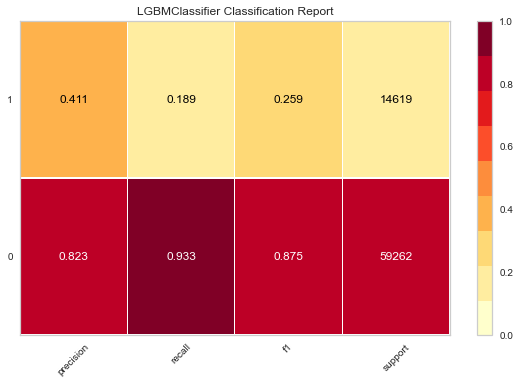

In [54]:
plot_model(tuned_lightgbm, plot='class_report')

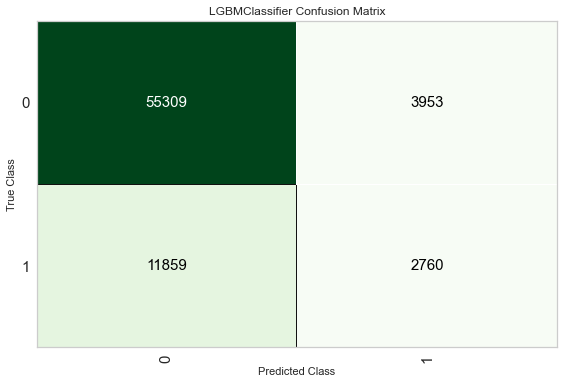

In [51]:
plot_model(tuned_lightgbm, plot='confusion_matrix')

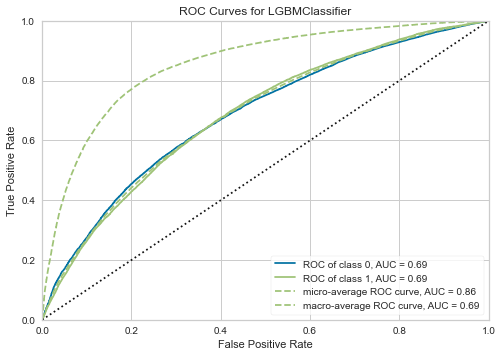

In [39]:
# Tuned ROC

plot_model(tuned_lightgbm, plot = 'auc')

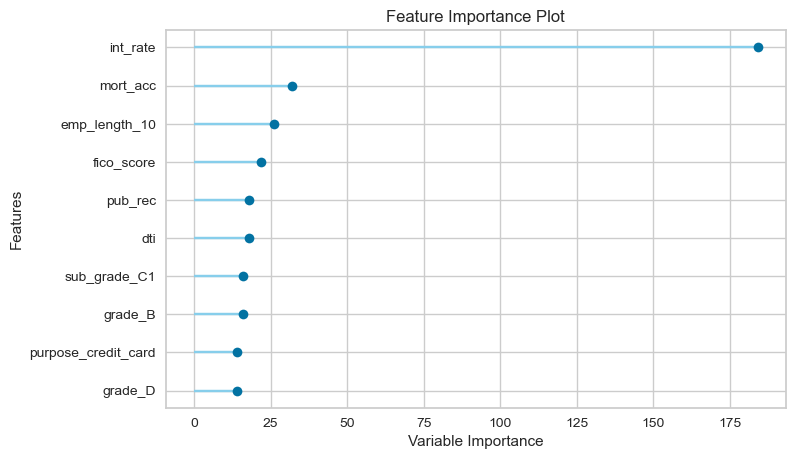

In [55]:
# Feature importance

plot_model(tuned_lightgbm, plot='feature')

## Logistic Regression


### Logistic Regression, Baseline

In [57]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5765,0.6447,0.6500,0.2674,0.3789,0.1355,0.1664
1,0.6417,0.6940,0.6398,0.3072,0.4151,0.2004,0.2284
2,0.6008,0.6723,0.6550,0.2825,0.3948,0.1621,0.1941
3,0.6370,0.6835,0.6331,0.3025,0.4094,0.1921,0.2194
4,0.6345,0.6888,0.6425,0.3026,0.4114,0.1934,0.2223
5,0.5722,0.6505,0.6536,0.2658,0.3779,0.1328,0.1642
6,0.6340,0.6854,0.6274,0.2994,0.4053,0.1863,0.2129
7,0.5688,0.6444,0.6472,0.2627,0.3737,0.1268,0.1569
8,0.6363,0.6917,0.6357,0.3025,0.4099,0.1924,0.2202
9,0.6416,0.6912,0.6305,0.3054,0.4115,0.1963,0.2230


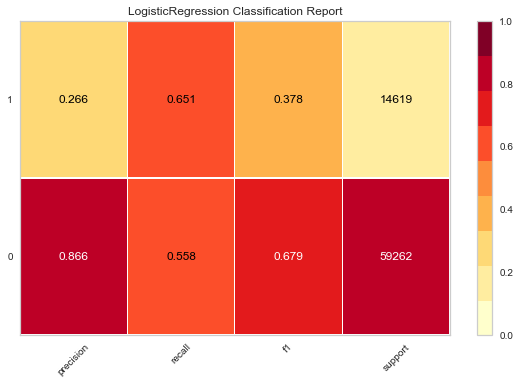

In [65]:
# Classification Report

plot_model(lr, plot='class_report')

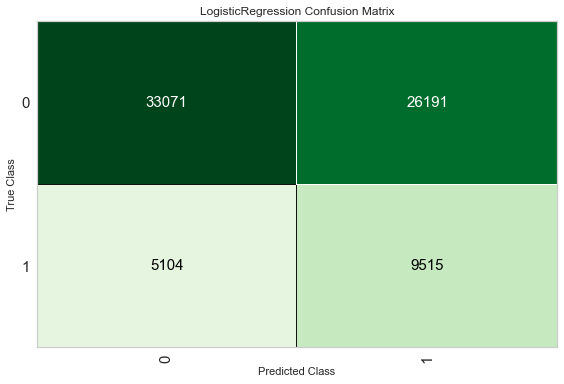

In [66]:
# Confusion Matrix

plot_model(lr, plot='confusion_matrix')

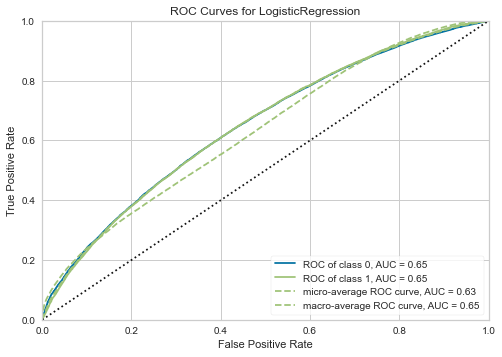

In [67]:
#base model ROC

plot_model(lr, plot = 'auc')

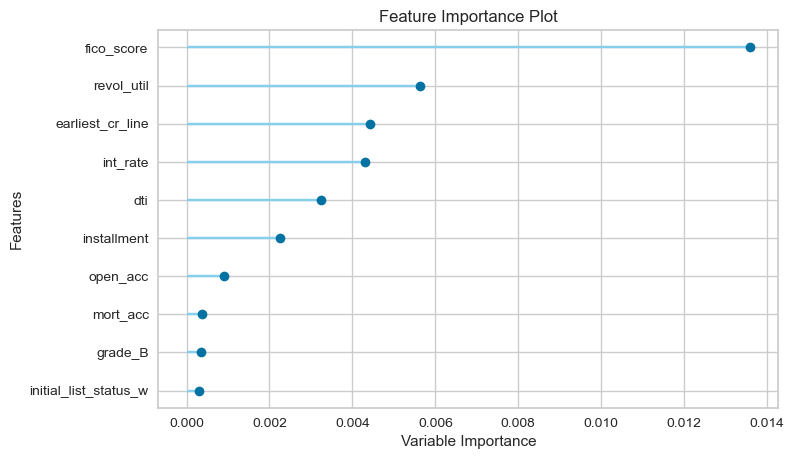

In [68]:
# Feature Importance

plot_model(lr, plot='feature')

### Logistic Regression, Tuned and Optimized

In [58]:
tuned_lr = tune_model(lr, optimize='Recall' )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5966,0.6616,0.6439,0.2778,0.3881,0.1529,0.1831
1,0.6034,0.6716,0.6503,0.2832,0.3946,0.1628,0.1939
2,0.6357,0.6939,0.6357,0.3021,0.4096,0.1918,0.2196
3,0.6024,0.6669,0.6468,0.2819,0.3927,0.1602,0.1909
4,0.5738,0.6481,0.6495,0.2659,0.3773,0.1326,0.1633
5,0.5997,0.6716,0.6580,0.2825,0.3953,0.1622,0.1947
6,0.5709,0.6425,0.6420,0.2628,0.3730,0.1266,0.1559
7,0.5689,0.6444,0.6472,0.2628,0.3738,0.1269,0.1570
8,0.6010,0.6686,0.6535,0.2823,0.3943,0.1616,0.1934
9,0.6051,0.6713,0.6465,0.2835,0.3942,0.1629,0.1934


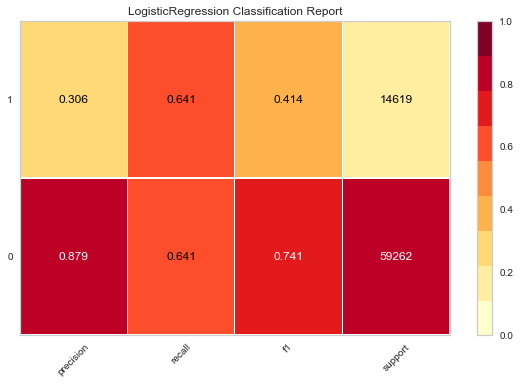

In [70]:
# Classification Report

plot_model(tuned_lr, plot='class_report')

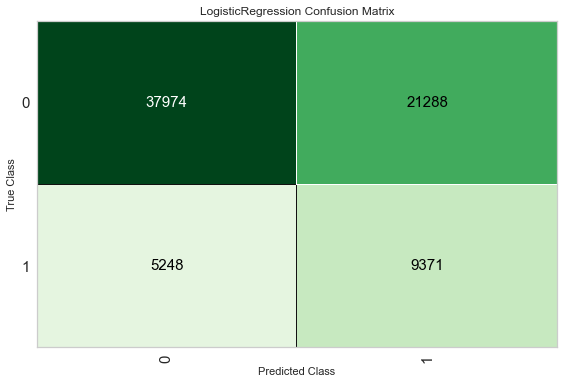

In [71]:
# Confusion Matrix

plot_model(tuned_lr, plot='confusion_matrix')

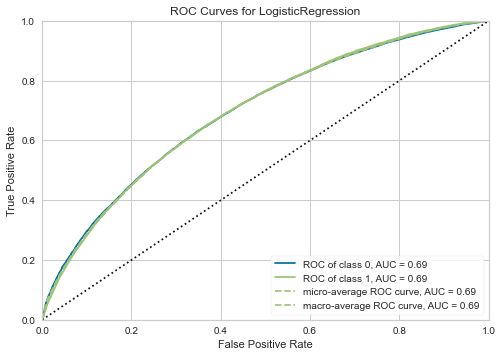

In [72]:
#base model ROC

plot_model(tuned_lr, plot = 'auc')

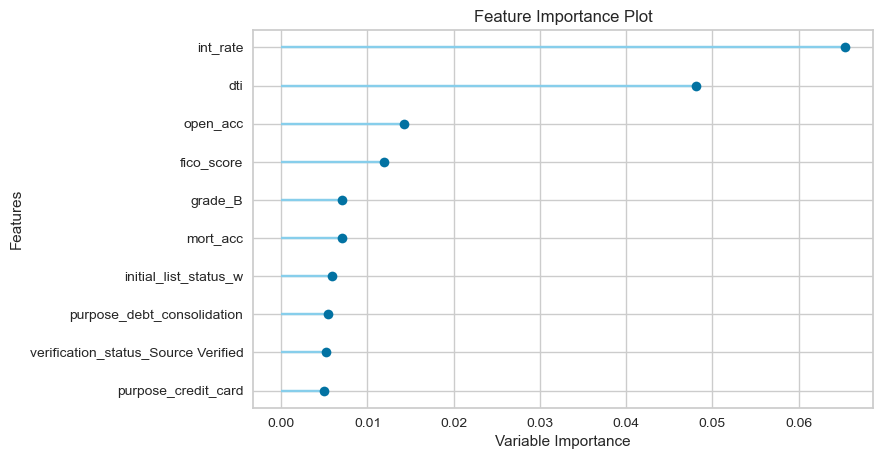

In [73]:
# Feature Importance

plot_model(tuned_lr, plot='feature')

## Naive Bayes Classifier

### Naive Bayes Classifier, Baseline

In [59]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4633,0.6563,0.7945,0.2415,0.3704,0.0944,0.1473
1,0.4709,0.6658,0.8044,0.2459,0.3767,0.1039,0.1611
2,0.4736,0.6591,0.7936,0.2452,0.3747,0.1020,0.1565
3,0.4670,0.6490,0.7875,0.2418,0.3700,0.0947,0.1462
4,0.4658,0.6569,0.8027,0.2438,0.3740,0.0993,0.1552
5,0.4788,0.6583,0.7937,0.2473,0.3771,0.1062,0.1614
6,0.4750,0.6541,0.7890,0.2451,0.3740,0.1014,0.1547
7,0.4762,0.6579,0.7896,0.2457,0.3748,0.1027,0.1563
8,0.4793,0.6602,0.7869,0.2464,0.3753,0.1041,0.1574
9,0.4542,0.6641,0.8074,0.2402,0.3703,0.0921,0.1474


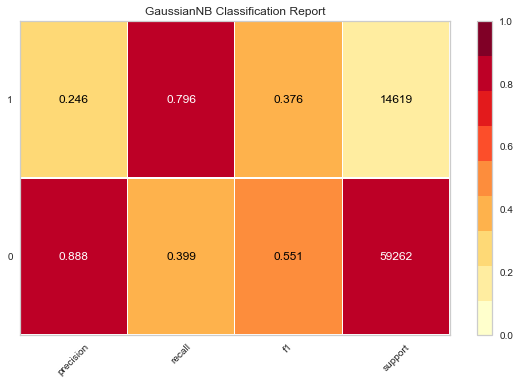

In [74]:
# Classification Report

plot_model(nb, plot='class_report')

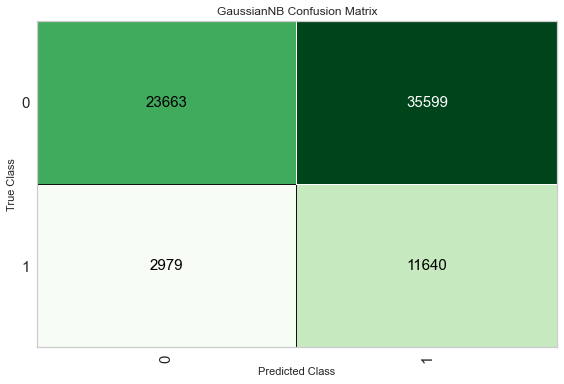

In [75]:
# Confusion Matrix

plot_model(nb, plot='confusion_matrix')

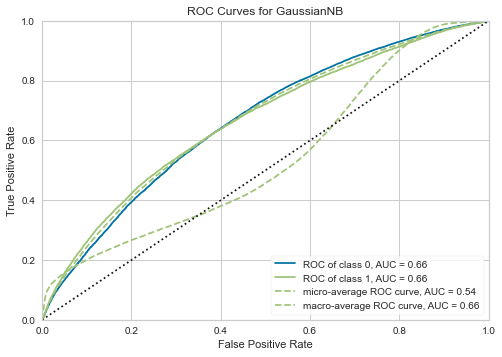

In [76]:
#base model ROC

plot_model(nb, plot = 'auc')

### Naive Bayes Classifier, Tuned and Optimized

In [60]:
tuned_nb = tune_model(nb, optimize='Recall' )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3368,0.5944,0.8625,0.2123,0.3408,0.0320,0.0697
1,0.3415,0.5953,0.8713,0.2148,0.3446,0.0379,0.0821
2,0.3433,0.5935,0.8622,0.2140,0.3429,0.0359,0.0767
3,0.3512,0.5881,0.8418,0.2132,0.3402,0.0338,0.0692
4,0.3457,0.5923,0.8547,0.2136,0.3418,0.0348,0.0733
5,0.3619,0.5825,0.8264,0.2139,0.3399,0.0352,0.0690
6,0.3504,0.5807,0.8351,0.2121,0.3383,0.0310,0.0632
7,0.3550,0.5910,0.8471,0.2151,0.3430,0.0380,0.0774
8,0.3507,0.5892,0.8412,0.2130,0.3399,0.0333,0.0682
9,0.3271,0.5938,0.8719,0.2111,0.3399,0.0293,0.0664


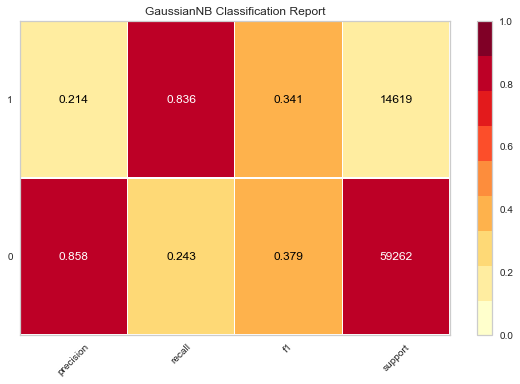

In [79]:
# Classification Report

plot_model(tuned_nb, plot='class_report')

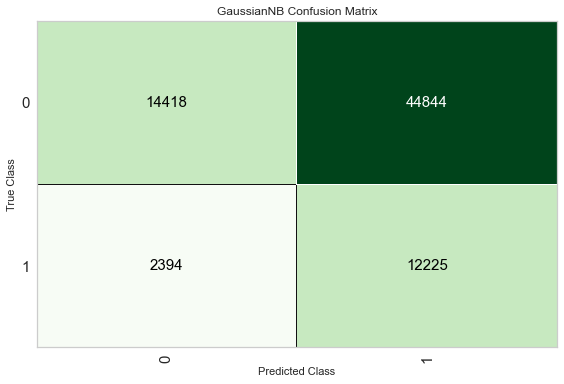

In [80]:
# Confusion Matrix

plot_model(tuned_nb, plot='confusion_matrix')

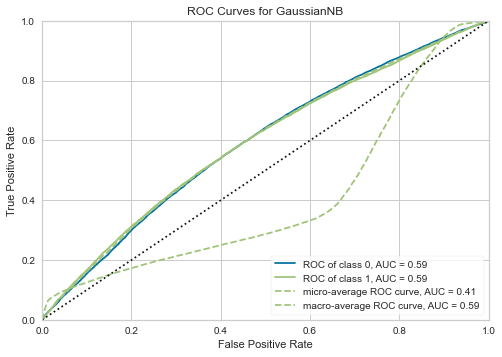

In [81]:
#base model ROC

plot_model(tuned_nb, plot = 'auc')


# Best Model Analysis

We have succesffuly tested both baseline and tuned models with a 10 fold cross validation. Also, we have allowered for some interations of tuning and optimizing the beaseline models. 

In this section we will conduct the following: High Level Model Validation of our best model (Tuned Logistic Regression) and validate prediction on our test-set.

In [83]:
# model prediction

tuned_lr_holdout_pred = predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6408,0.6948,0.6410,0.3057,0.4139,0.1994,0.2279


In [85]:
# Getting the validation of our model performance to the test set

tuned_lr_predictions = predict_model(tuned_lr, data = df_dummy)

# view smaple predictions

tuned_lr_predictions.sample(10)

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w,application_type_Joint App,Label,Score
105317,15000,6,457.97,4,60000.0,0,24,2004,11,0,...,0,0,0,0,0,0,0,0,0,0.7566
85341,16000,9,335.57,10,80000.0,0,10,2000,9,0,...,0,0,0,0,0,0,1,0,0,0.7024
119062,11200,8,353.35,1,40040.0,0,21,2010,20,0,...,0,0,0,0,0,0,0,0,0,0.7631
190777,20000,6,616.82,10,100000.0,0,16,2002,13,0,...,0,0,0,0,0,0,1,0,0,0.7081
121272,4300,10,140.33,4,45000.0,0,1,2007,4,0,...,0,0,0,0,0,0,1,0,0,0.7538
140039,4800,17,172.50,7,30912.0,0,15,1991,3,0,...,0,0,0,0,0,0,0,0,0,0.5979
94536,35000,29,1121.43,10,98000.0,1,22,2004,15,0,...,0,0,0,0,0,0,0,0,1,0.8369
205149,28000,8,879.88,10,75000.0,0,16,1987,10,1,...,0,0,0,0,0,0,1,0,1,0.5004
229335,10000,6,304.59,5,50000.0,0,11,1994,7,0,...,0,0,0,0,0,0,1,0,0,0.9489
79818,20000,7,622.04,3,106000.0,0,21,1976,20,0,...,1,0,0,0,0,0,0,0,0,0.6348


Key Points: 

The Tuned Logistic Regression showed favorable results:

* Model Accuracy, 64% 

* AUC, 69%

* Recall, 64%

Although, the results are not above 80% across the board, we can say we can successfully predict if a client will default over 60% of the time. 

###### * Above you can check loan_status and scroll to the very end of the table to see predicted label and score



# Phase II Initiative Model Analysis 

* At this point in time with the application of PyCaret with SMOTE were able to improve upon our initial SKLearn Logistic Regression models. 


* With all three benchmark indicators hit .60 across the board this is a positive sign.


Consideration(s):

* Instead of dummying out all our categorical variables, we will map them and see how the models will perform. 


* Application of  class weighting and experimenting with undersampling the majority class as a means of handling the class imbalance.


* Increasing the threshold by optimizing it to over 50% 


* Creating more complex models (embedding, bagging, and stacking), even though complexity does not usually mean higher performance. We can still experiment and evaluate any changes to performance.

# Business Translation: Net Revenue Function


The net revenue or cost function is derived by apportioning a cost for every false positive and false negative and arriving at the overall revenue based on the correct and incorrect predictions.

* This is key in helping business stakeholder see the potential value or loss of this initiative in terms of both operational risk and revenue creation. 

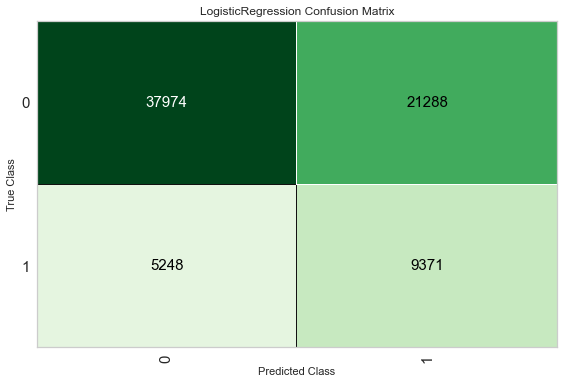

In [91]:
plot_model(tuned_lr, plot='confusion_matrix')

Net Revenue Function =

(# of True Negative * Average annual interest income per customer) 

Subtracted

(# of False Positive * false positive cost per customer)

Subtracted

(# of False Negative * false negative cost per customer)

Subtracted

(# of True Positive * true positive cost per customer) 



Example of key values for calculating Net Revenue:

* Average annual interest income from a customer who repays a loan = 12,000

* Average loan principal amount = 1,000,000

* Application processing cost = 3,000


Allocation of FP, FN, & TP cost:

* FP Cost = -12,000
* FN Cost = -1,000,000
* TP cost = -3000
* TN Revenue = 12000

In [93]:
#Claculating net rev

Net_Rev = (37974*12000)-(21288*(-12000))-(5248*(-3000))-(9371*(-1000000))

In [95]:
# Sanity check (# of True Negative * Average annual interest income per customer)

(37974*12000)

455688000

In [96]:
# Sanity check (# of False Positive * false positive cost per customer)

(21288*(-12000))

-255456000

In [97]:
# Sanity check (# of False Negative * false negative cost per customer)

(5248*(-3000))

-15744000

In [98]:
# Sanity check (# of True Positive * true positive cost per customer)

(9371*(-1000000))

-9371000000

In [101]:
# Printing Net Rev

print("This is the Net Revenue by using this model $", Net_Rev)

This is the Net Revenue by using this model $ 10097888000


Key Points:

* Using our best model Tuned_Logistic_regression, we were able to quantify a potential Net Revenue gain of 10 billion


Consideration(s):

* In the final stage of this project I intend to apply the net revenue function to quantify the potential revenue gain or losses of each of the models.

# SWOT Analysis, Phase II (Capstone)

## Strengths


Business Analysis: 

* Extensive univariant and bivariant analysis, in terms of understanding the landscape of our current asset. Further, we are also able to hone in on some specific variables that will be addressed and further examined in Phase Two of this initiative.


Workflow and Process Management:

* As this is the first iteration of the initiative, we were able to create a smooth transition process from notebook to notebook. There are some sections that need to be enhanced and expanded, which will be done post Final Phase reporting. In terms, of workflow management we have instituted a plan of action, subject to priority changes after approval or recommendation from our project management team.


Leveraging External Dependencies (when needed):

* We were able to leverage PyCaret. Again, this is not our primary modeling process but will be used a supplement and for enhanced model analysis with respects to the SKLean bespoke models we will continue to build out, tests, and tune. Note, we will also be building out again SKLean models 


* Tableau was used on the onset and will be important in creating the analytics dashboard in Phase II of the initiative. More to come on the business intelligence deployment.

## Weaknesses


Computing Power


* We all recognized that computing and processing power were going to have a great effect in our process management. However, we were able to deploy an additional dependecy/library (PyCaret). Although a great tool, we should not be reliant on one external tool. 


Modeling Process:


* A mentioned above we cannot be reliant on just one modeling library, internal or external. 


* The need to create multiple assets and creating more "model testing" notebooks for better management of model processing and analysis.



## Opportunity

Modeling Workforce Management:

1) We will be remapping our modeling operational supply chain to better run multiple concurrent bespoke SKLean models. We can leverage other external processing via the cloud and from vendors such as Docker and AWS.


2) Creating a enhanced and intuitive approach to metrics and model evaluation. We already know how we want to process our post-modeling analysis, but we would like this opportunity to add more metrics that are translatable to our business stakeholders.



Business Intelligence:

* The Deployment of Tableau Dashboards:


1) Storyboarding the customer journey through and highlight key metrics used in the application process.

2) Post model analysis storytelling for business stakeholders.

3) understanding the landscape of applicants whom been rejected via the "rejected_applicant" asset we have also acquired. 



Quantifying Potential Revenue (gain and loss):

* Application of the Net Revenue and Cost Function, to help gain an understanding if this initiative or future machine learning projects are worth the time and effort for the organization. This helps business stakeholders quantify if projects like this have revenue streams and assess if the current on-boarding model needs to be revamped. 



RPA (robotic process automation):

* The application of RPA in terms of automating the application process for a smooth transition in identifying high risk applicants. Also automation in workflow process management to reduce errors intra-organizationally/internally. Moreover, RPA is widely used not only in document processing. But can be utilized in the risk management process in conjunction with the model post user acceptance testing. This will alert all stakeholders in identifying risky applicants as first line risk defense and for analysis if a client defaults. 


## Threats


Resource Management:

* In the Final Phase of the initiative, we have listed opportunities above, we needed to also be aware of the time constraints of the Final Phase. We also recognize there is so much opportunity for enhancements, but we must act cautiously to not miss-manage resources.


Deadline Awareness:

* Again, we would like to take every opportunity to make Final Phase a whole a complete project. However, we should also be willing to drop or side-bar certain opportunities to ensure project deliverables are met. This can also viewed as situational awareness and expectation management. 

# Next Steps


## Priorities for Final Stage of The Initiative


* Finalize all Tableau Dashboards for business stakeholders. With user acceptance testing (UAT) of Tableau business intelligence dashboards for key stakeholders


* Have the model ready for pre-deployment, if time willing deployment through a front end user interface


* Finalize project report for business stakeholders. 